# Tarea 3 Movilidad
### Preguntas:
- ¿se visitan mas los parques?
- ¿La gente usa mas el auto o camina?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfap = pd.read_csv('applemobilitytrends-2021-11-30.csv', 
                     encoding='utf-8',
                    sep=',')
dfgo = pd.read_csv('2021_CL_Region_Mobility_Report.csv', 
                     encoding='utf-8',
                    sep=',')
pd.set_option("display.max_columns", None)

C:\Users\Ariel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dfap.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03,

In [4]:
dfgo.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-01,-87.0,-82.0,-59.0,-75.0,-78.0,29.0
1,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-02,-62.0,-32.0,-57.0,-51.0,-36.0,20.0
2,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-03,-60.0,-35.0,-56.0,-43.0,-18.0,16.0
3,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-04,-26.0,-5.0,-34.0,-24.0,-20.0,12.0
4,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-05,-26.0,-4.0,-32.0,-24.0,-20.0,12.0


# *Dataframe de Google (dfgo)
##### Se procede a utilizar la información proporcionada por Google debido a la gran variedad demográfica que esta puede representar por factores como cantidad de androids vs iphones alrededor del país, con tal de reducir cualquier posible sesgo. Tambien existe otro factor: Google tambien puede recopilar información de iphones que usen GoogleMaps.

In [5]:
dfgo['sub_region_1'].value_counts()

Valparaíso                           2988
Santiago Metropolitan Region         2324
Los Lagos                            1660
Aysén                                1660
Maule                                1660
Coquimbo                             1328
O'Higgins                            1328
Ñuble                                1328
Bio Bio                              1328
Atacama                              1328
Antofagasta                          1328
Magallanes and Chilean Antarctica    1328
Araucania                             996
Tarapacá                              996
Los Ríos                              996
Arica y Parinacota                    664
Name: sub_region_1, dtype: int64

In [6]:
dfgo=dfgo.loc[dfgo['sub_region_1']=='Santiago Metropolitan Region',:] # Se buscan solo los datos de la Region Metropolitana
print(dfgo.apply(lambda col: col.unique()))   #valores unicos de cada columna del DF para entender cuales columnas son utiles

country_region_code                                                                                [CL]
country_region                                                                                  [Chile]
sub_region_1                                                             [Santiago Metropolitan Region]
sub_region_2                                          [nan, Chacabuco Province, Cordillera Province,...
metro_area                                                                                        [nan]
iso_3166_2_code                                                                            [CL-RM, nan]
census_fips_code                                                                                  [nan]
place_id                                              [ChIJUR74fWpvYpYR2oNLRG3CzWA, ChIJT6b9f067YpYR...
date                                                  [2021-01-01, 2021-01-02, 2021-01-03, 2021-01-0...
retail_and_recreation_percent_change_from_baseline    [-89.0, -6

In [7]:
dfgo=dfgo[['sub_region_2','date' , 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',
         'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline',
         'residential_percent_change_from_baseline']]


In [8]:
dfgo = dfgo.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'retail and recreation',
                           'grocery_and_pharmacy_percent_change_from_baseline' : 'grocery and pharmacy',
                           'parks_percent_change_from_baseline' : 'parks',
                           'transit_stations_percent_change_from_baseline' : ' Transit stations',
                           'workplaces_percent_change_from_baseline' : 'workplace',
                           'residential_percent_change_from_baseline':'residential'})

In [9]:
#dfgo.loc[dfgo['sub_region_2'].isnull(),:]

In [10]:
dfgo['date']=pd.to_datetime(dfgo['date'])
dfgo.sort_values(['date'],ascending=True).head(15)

,sub_region_2,date,retail and recreation,grocery and pharmacy,parks,Transit stations,workplace,residential
17264,NaN,2021-01-01,-89.0,-83.0,-69.0,-78.0,-82.0,32.0
18924,Santiago Province,2021-01-01,-91.0,-85.0,-74.0,-79.0,-83.0,32.0
17928,Cordillera Province,2021-01-01,-84.0,-83.0,-30.0,-69.0,-79.0,31.0
19256,Talagante Province,2021-01-01,-65.0,-75.0,-69.0,-48.0,-77.0,32.0
18592,Melipilla Province,2021-01-01,-78.0,-72.0,-79.0,-65.0,-74.0,33.0
17596,Chacabuco Province,2021-01-01,-76.0,-75.0,-41.0,-65.0,-79.0,36.0
18260,Maipo Province,2021-01-01,-81.0,-78.0,-38.0,-65.0,-79.0,31.0
18593,Melipilla Province,2021-01-02,-61.0,-26.0,-73.0,-60.0,-35.0,24.0
17597,Chacabuco Province,2021-01-02,-37.0,-26.0,13.0,-45.0,-30.0,23.0
18925,Santiago Province,2021-01-02,-70.0,-34.0,-60.0,-54.0,-42.0,23.0


In [11]:
dfgo=dfgo.melt(id_vars=['sub_region_2','date'])
dfgo=dfgo.rename(columns={'variable':'place','value': 'percentage change'})

In [12]:
dfgo=dfgo.reset_index().drop(columns='index')
dfgo.head()

,sub_region_2,date,place,percentage change
0,NaN,2021-01-01,retail and recreation,-89.0
1,NaN,2021-01-02,retail and recreation,-67.0
2,NaN,2021-01-03,retail and recreation,-64.0
3,NaN,2021-01-04,retail and recreation,-22.0
4,NaN,2021-01-05,retail and recreation,-23.0


# Grafico con todos los lugares de movilidad

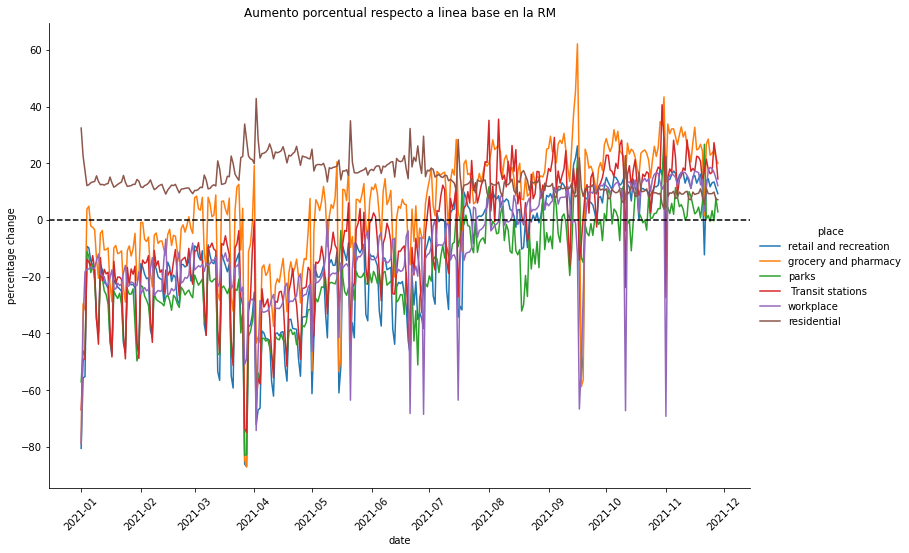

In [13]:

sns.relplot(data=dfgo, x="date", y="percentage change",hue='place',ci=None,height=7, aspect=1.5,
            kind='line').set(title='Aumento porcentual respecto a linea base en la RM')
plt.xticks(rotation=45)
plt.axhline(y=0,color='black', linestyle='--')


# Graficos por lugar de movilidad separados

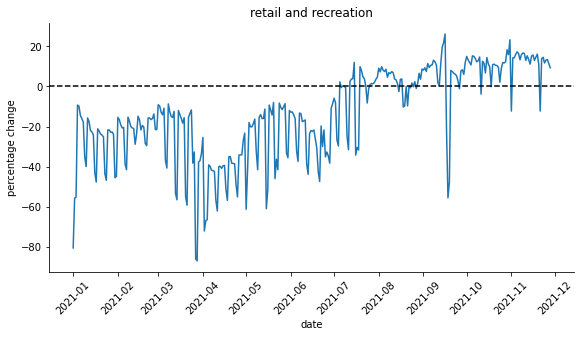

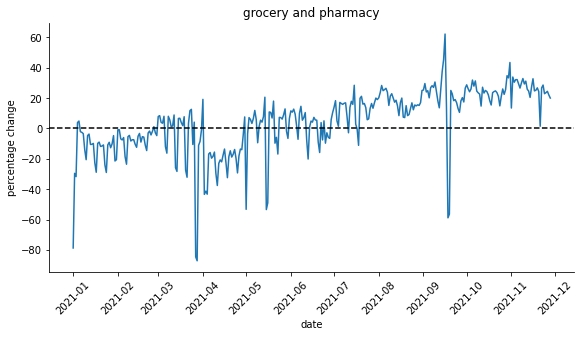

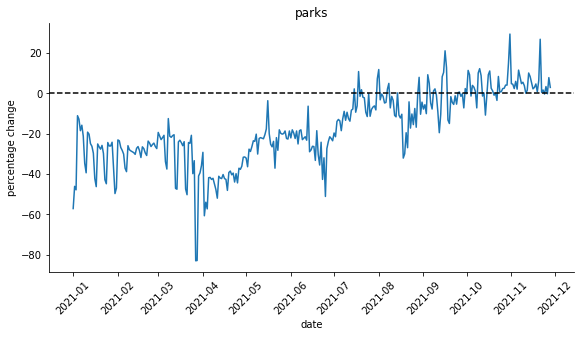

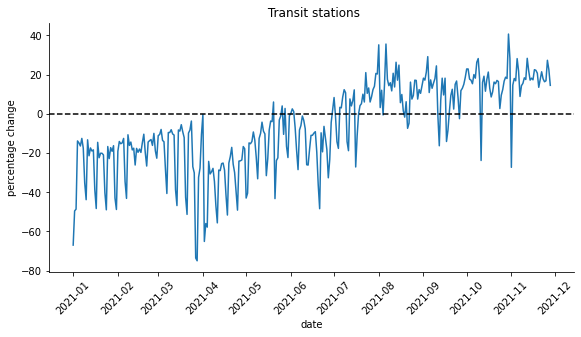

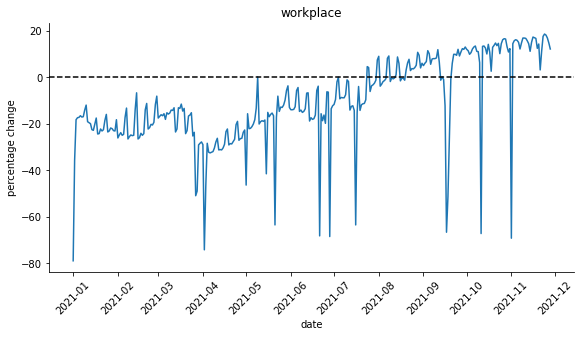

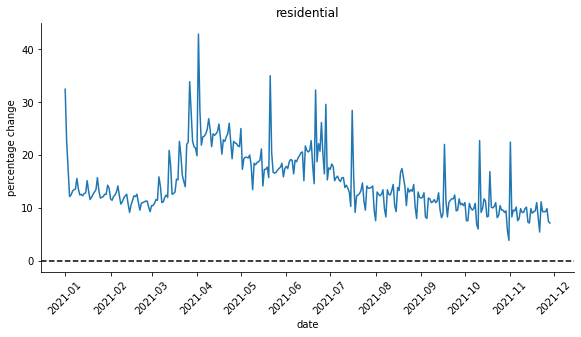

In [14]:
for i in dfgo.drop_duplicates(['place'])['place']:
    sns.relplot(data=dfgo.loc[dfgo['place']==i], x="date", y="percentage change",ci=None,height=4, aspect=2,
                kind='line').set(title=i)
    plt.xticks(rotation=45)
    plt.axhline(y=0,color='black', linestyle='--')

# ¿Han sido más visitados los parques?:
### Los parques han ido incrementando sus visitas dadas las menores restricciones impuestas por las autoridades.
### Se ve en el gráfico de parques que la movilidad a estos se ha normalizado e incluso aumentado relativamente al comparar periodos similares como febrero-marzo y octubre-noviembre.

# *Dataframe de apple (dfap)

In [15]:
dfap.head(2)

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03,

In [16]:
dfap=dfap.melt(id_vars=['geo_type','region','transportation_type','alternative_name','sub-region','country'])
dfap=dfap.rename(columns={'variable':'date'})

In [17]:
dfap.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,date,value
0,country/region,Albania,driving,NaN,NaN,NaN,2020-01-13,100.0
1,country/region,Albania,walking,NaN,NaN,NaN,2020-01-13,100.0
2,country/region,Argentina,driving,NaN,NaN,NaN,2020-01-13,100.0
3,country/region,Argentina,walking,NaN,NaN,NaN,2020-01-13,100.0
4,country/region,Australia,driving,AU,NaN,NaN,2020-01-13,100.0


In [18]:
dfap_1=dfap.loc[dfap['country'].str.lower()=='chile'] # Filtrar pais a Chile  
dfap_1.head()                                         # y dado que hay algunas irregularidades se decide llevar todo a lowercase

,geo_type,region,transportation_type,alternative_name,sub-region,country,date,value
791,city,Santiago,driving,Santiago de Chile,Santiago Metropolitan Region,Chile,2020-01-13,100.0
792,city,Santiago,walking,Santiago de Chile,Santiago Metropolitan Region,Chile,2020-01-13,100.0
975,sub-region,Antofagasta Region,driving,Región de Antofagasta,NaN,Chile,2020-01-13,100.0
989,sub-region,Araucanía Region,driving,Región de la Araucanía,NaN,Chile,2020-01-13,100.0
990,sub-region,Arica and Parinacota Region,driving,Región de Arica y Parinacota,NaN,Chile,2020-01-13,NaN


In [19]:
dfap_2=dfap.loc[dfap['region'].str.lower()=='chile'] # En ocasiones el pais está indicado en la columna "region", se filtra por esta
dfap_2.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,date,value
22,country/region,Chile,driving,NaN,NaN,NaN,2020-01-13,100.00
23,country/region,Chile,walking,NaN,NaN,NaN,2020-01-13,100.00
4713,country/region,Chile,driving,NaN,NaN,NaN,2020-01-14,99.01
4714,country/region,Chile,walking,NaN,NaN,NaN,2020-01-14,102.58
9404,country/region,Chile,driving,NaN,NaN,NaN,2020-01-15,102.57


In [20]:
dfap_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13760 entries, 791 to 3224666
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   geo_type             13760 non-null  object 
 1   region               13760 non-null  object 
 2   transportation_type  13760 non-null  object 
 3   alternative_name     13760 non-null  object 
 4   sub-region           1376 non-null   object 
 5   country              13760 non-null  object 
 6   date                 13760 non-null  object 
 7   value                11651 non-null  float64
dtypes: float64(1), object(7)
memory usage: 967.5+ KB


In [21]:
dfap_2.info() #aquellos datos que contienen "Chile" como región no sirven para la finalidad del análisis ya que no se pueden ubicar regionalmente

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 22 to 3222740
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   geo_type             1376 non-null   object 
 1   region               1376 non-null   object 
 2   transportation_type  1376 non-null   object 
 3   alternative_name     0 non-null      object 
 4   sub-region           0 non-null      object 
 5   country              0 non-null      object 
 6   date                 1376 non-null   object 
 7   value                1370 non-null   float64
dtypes: float64(1), object(7)
memory usage: 96.8+ KB


### Dado que los datos estan muy desordenados, se procede a identificar la manera de limpiarlos analizando cada columna de interés.

In [22]:
print(dfap_1.apply(lambda col: col.unique())['alternative_name'])  #valores únicos de columna 'alternative_name'

['Santiago de Chile' 'Región de Antofagasta' 'Región de la Araucanía'
 'Región de Arica y Parinacota' 'Región de Atacama'
 'Región Aysén del General Carlos Ibáñez del Campo|Región de Aysén|Aysén Region'
 'Región del Biobío' 'Región de Coquimbo'
 "Región del Libertador General Bernardo O'Higgins|Región de O’Higgins|O'Higgins Region"
 'Región de Los Lagos' 'Región de Los Ríos'
 'Región de Magallanes y de la Antártica Chilena|Región de Magallanes|Magallanes Region'
 'Región del Maule'
 'Región Metropolitana de Santiago|Región Metropolitana|Metropolitan Region'
 'Región de Tarapacá' 'Región de Valparaíso']


In [23]:
print(dfap_1.apply(lambda col: col.unique())['region'])            #valores únicos de columna 'region'

['Santiago' 'Antofagasta Region' 'Araucanía Region'
 'Arica and Parinacota Region' 'Atacama Region'
 'Aysén del General Carlos Ibáñez del Campo Region' 'Biobío Region'
 'Coquimbo Region' "Libertador General Bernardo O'Higgins Region"
 'Los Lagos Region' 'Los Ríos Region'
 'Magallanes and the Chilean Antarctic Region' 'Maule Region'
 'Santiago Metropolitan Region' 'Tarapacá Region' 'Valparaíso Region']


In [24]:
print(dfap_1.apply(lambda col: col.unique())['sub-region'])        #valores únicos de columna 'sub-region'

['Santiago Metropolitan Region' nan]


In [25]:
lista_an = ['Santiago de Chile','Región Metropolitana de Santiago','Región Metropolitana','Metropolitan Region',
           'Región Metropolitana de Santiago|Región Metropolitana|Metropolitan Region'] # 'alternative_name'
lista_re = ['Santiago','Santiago Metropolitan Region']                                  # 'region'
sub_reg  = ['Santiago Metropolitan Region']                                             # 'sub-region'


In [26]:
dfap_an = dfap_1[dfap_1['alternative_name'].isin(lista_an)]
dfap_re = dfap_1[dfap_1['region'].isin(lista_re)]
dfap_sub = dfap_1[dfap_1['sub-region'].isin(sub_reg)]

In [27]:
dfap_an_re=pd.merge(dfap_an,dfap_re, how='outer')

In [28]:
dfapple=pd.merge(dfap_an_re,dfap_sub, how='outer')

In [29]:
dfapple.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,date,value
0,city,Santiago,driving,Santiago de Chile,Santiago Metropolitan Region,Chile,2020-01-13,100.00
1,city,Santiago,walking,Santiago de Chile,Santiago Metropolitan Region,Chile,2020-01-13,100.00
2,sub-region,Santiago Metropolitan Region,driving,Región Metropolitana de Santiago|Región Metrop...,NaN,Chile,2020-01-13,100.00
3,sub-region,Santiago Metropolitan Region,walking,Región Metropolitana de Santiago|Región Metrop...,NaN,Chile,2020-01-13,100.00
4,city,Santiago,driving,Santiago de Chile,Santiago Metropolitan Region,Chile,2020-01-14,101.96


In [30]:
dfapple.info()
print(dfapple.apply(lambda col: col.unique())['transportation_type'])    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2751
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   geo_type             2752 non-null   object 
 1   region               2752 non-null   object 
 2   transportation_type  2752 non-null   object 
 3   alternative_name     2752 non-null   object 
 4   sub-region           1376 non-null   object 
 5   country              2752 non-null   object 
 6   date                 2752 non-null   object 
 7   value                2742 non-null   float64
dtypes: float64(1), object(7)
memory usage: 193.5+ KB
['driving' 'walking']


# Movilidad en la Región Metropolitana:
### Se exibe en el siguiente gráfico que la movilidad tuvo un fuerte golpe al comenzar la llegada del COVID-19 a chile y su propagación que obligó a restringir el movimiento de las personas. Dado que las cuarentenas ya no puestas actualmente, se ve que se regresa a algo cercano a la normalidad en enero de 2020 a diferencia de enero 2021.

# ¿La gente usa mas el auto o camina?
### Como se muestra en el gráfico a continuación, la diferencia entre estas variables de transporte es minima durante enero de 2020 y finales de 2021. En el caso de la epoca de pandemia, se nota que existe una clara distinción a favor del transporte vehicular.

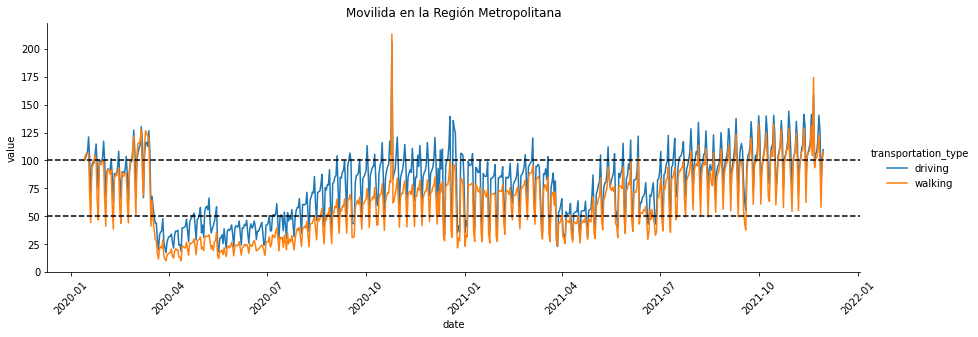

In [31]:
dfapple['date']=pd.to_datetime(dfapple['date'])
dfapple['date']=dfapple['date'].dt.normalize()
sns.relplot(data=dfapple, x="date", y="value",hue='transportation_type',ci=None,height=4, aspect=3,
            kind='line').set(title='Movilida en la Región Metropolitana')
plt.xticks(rotation=45)
plt.axhline(y=100,color='black', linestyle='--')
plt.axhline(y=50,color='black', linestyle='--')

## Día de mayor movilidad:

In [32]:
df_drive=dfapple.loc[dfapple['transportation_type']=='driving']
df_walk=dfapple.loc[dfapple['transportation_type']=='walking']
max_drive=df_drive['value'].max()
print(max_drive)
max_walk=df_walk['value'].max()
print(max_walk)

dia_max_drive=df_drive.loc[df_drive['value']==max_drive,['date','value']]
dia_max_walk=df_walk.loc[df_walk['value']==max_walk,['date','value']]
dia_max_drive

208.81
213.91


,date,value
1144,2020-10-25,208.81


In [33]:
dia_max_walk

,date,value
1147,2020-10-25,213.91


In [34]:
print('Movilidad total 25-octubre-2020:  '+str(max_drive+max_walk))

Movilidad total 25-octubre-2020:  422.72


# El mayor día de mayor movilidad es el 25 de Octubre del 2020, día en que se realizó el plebiscito nacional.
## El valor de movilidad que se obtiene es de 422.72